In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Garbage Classification/

/gdrive/MyDrive/Garbage Classification


In [4]:
ls

glass/  paper/  plastic/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Garbage Classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1577 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['glass', 'paper', 'plastic']

In [10]:
len(dataset)

26

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[177.25  147.25  113.25 ]
  [177.25  147.25  113.25 ]
  [177.25  147.25  113.25 ]
  ...
  [150.    133.    105.   ]
  [149.    132.    104.   ]
  [148.625 131.625 103.625]]

 [[178.    148.    114.   ]
  [178.    148.    114.   ]
  [178.    148.    114.   ]
  ...
  [150.375 133.375 106.875]
  [149.375 132.375 105.875]
  [149.    132.    105.5  ]]

 [[178.25  148.25  114.25 ]
  [178.25  148.25  114.25 ]
  [178.25  148.25  114.25 ]
  ...
  [151.    134.    108.   ]
  [150.125 133.125 107.125]
  [149.25  132.25  106.25 ]]

 ...

 [[239.75  219.75  194.75 ]
  [239.    219.    194.   ]
  [238.375 218.375 193.375]
  ...
  [145.    145.    137.   ]
  [144.125 144.125 136.125]
  [143.25  143.25  135.25 ]]

 [[240.    220.    195.   ]
  [239.625 219.625 194.625]
  [239.    219.    194.   ]
  ...
  [144.375 144.375 136.375]
  [143.375 143.375 135.375]
  [143.    143.    135.   ]]

 [[240.375 220.375 195.375]
  [240.    220.    195.   ]
  [239.    219.    194.   ]
 

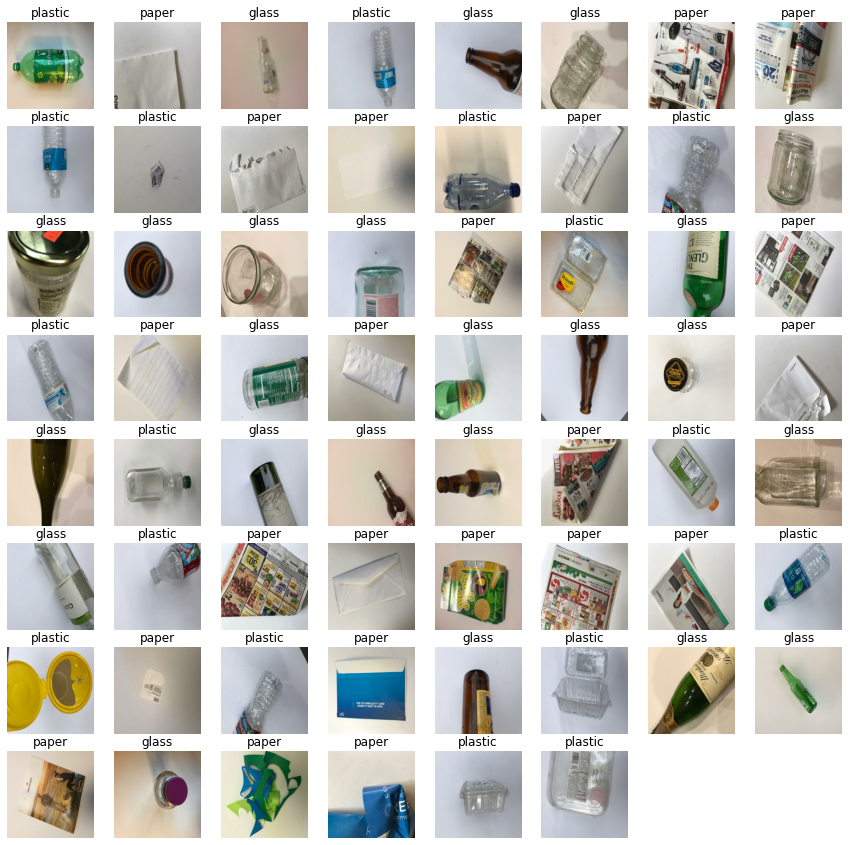

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
20/20 [==============================] - 240s 6s/step - loss: 1.4208 - accuracy: 0.3323 - val_loss: 1.1334 - val_accuracy: 0.3548
Epoch 2/20
20/20 [==============================] - 109s 5s/step - loss: 1.1170 - accuracy: 0.3508 - val_loss: 1.1446 - val_accuracy: 0.2903
Epoch 3/20
20/20 [==============================] - 107s 5s/step - loss: 1.1078 - accuracy: 0.3798 - val_loss: 1.1063 - val_accuracy: 0.4032
Epoch 4/20
20/20 [==============================] - 108s 5s/step - loss: 1.0888 - accuracy: 0.3927 - val_loss: 1.0551 - val_accuracy: 0.4758
Epoch 5/20
20/20 [==============================] - 108s 5s/step - loss: 1.0267 - accuracy: 0.4669 - val_loss: 0.9863 - val_accuracy: 0.4677
Epoch 6/20
20/20 [==============================] - 107s 5s/step - loss: 0.9965 - accuracy: 0.4952 - val_loss: 0.9354 - val_accuracy: 0.5565
Epoch 7/20
20/20 [==============================] - 111s 6s/step - loss: 0.9430 - accuracy: 0.5177 - val_loss: 0.8599 - val_accuracy: 0.5726
Epoch 8/20
20

In [21]:
model.evaluate(test_ds)

4/4 [==============================] - 9s 1s/step - loss: 0.4196 - accuracy: 0.8306


[0.4195617437362671, 0.8306451439857483]

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

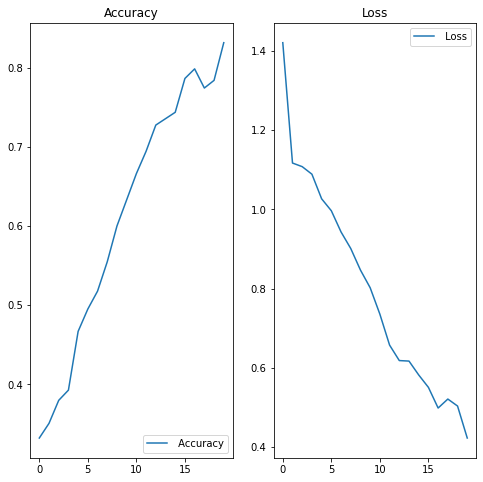

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

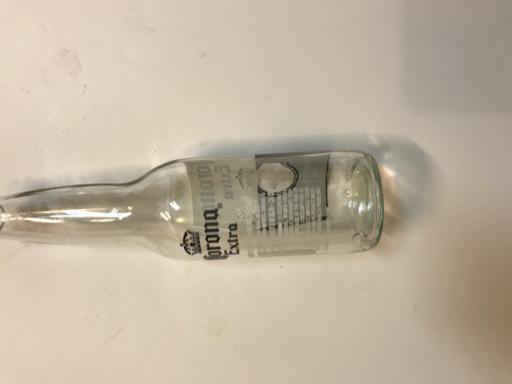

In [24]:
image_path = "/gdrive/My Drive/glass500.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'glass'

In [28]:
model.save("Garbage Classification.h5")